In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 

warnings.filterwarnings("ignore") 

df = pd.read_csv("haberman.csv") #Loading haberman.csv
print(df)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
5     33    58     10       1
6     33    60      0       1
7     34    59      0       2
8     34    66      9       2
9     34    58     30       1
10    34    60      1       1
11    34    61     10       1
12    34    67      7       1
13    34    60      0       1
14    35    64     13       1
15    35    63      0       1
16    36    60      1       1
17    36    69      0       1
18    37    60      0       1
19    37    63      0       1
20    37    58      0       1
21    37    59      6       1
22    37    60     15       1
23    37    63      0       1
24    38    69     21       2
25    38    59      2       1
26    38    60      0       1
27    38    60      0       1
28    38    62      3       1
29    38    64      1       1
..   ...   ...    ...     ...
276   67    66      0       1
277   67  

## Question 1

In [2]:
print('Total number of points :', df['status'].count())

Total number of points : 306


In [3]:
print('Total number of features :', len(df.columns))

Total number of features : 4


In [4]:
print('Total number of points and features together :', df.shape)

Total number of points and features together : (306, 4)


In [5]:
print('Number of classes :', len(df['status'].unique()))

Number of classes : 2


In [6]:
print('Data points per class :')
print(df['status'].value_counts())

Data points per class :
1    225
2     81
Name: status, dtype: int64


#### Observation
1. More than 5 years survival is more i.e. 225
2. Dataset is an imbalanced dataset as the datapoints of survival more than 5 years is higher.

## Question 2

The main objective is to analyse all the features and find the best out of them and it could either one feature or more than one
which can be used to build a prediction of more survival (greater than 5 years) chances of a cancer patient.

## Question 3

Histograms

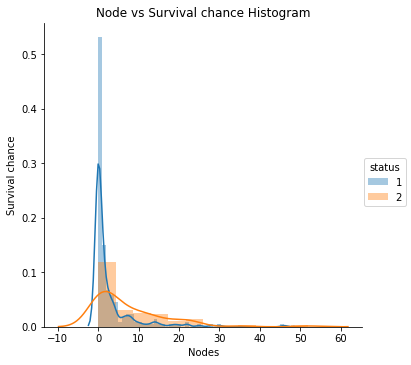

In [7]:
sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "nodes").add_legend();
plt.xlabel("Nodes")
plt.ylabel("Survival chance")
plt.title("Node vs Survival chance Histogram")
plt.show();

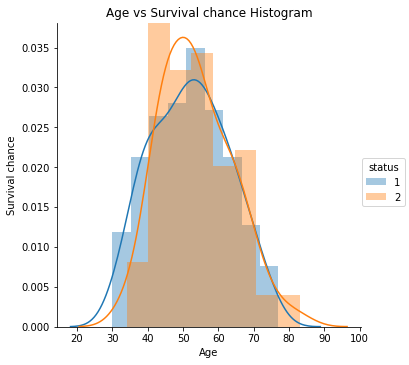

In [8]:
plt.close()
sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "age").add_legend();
plt.xlabel("Age")
plt.ylabel("Survival chance")
plt.title("Age vs Survival chance Histogram")
plt.show();

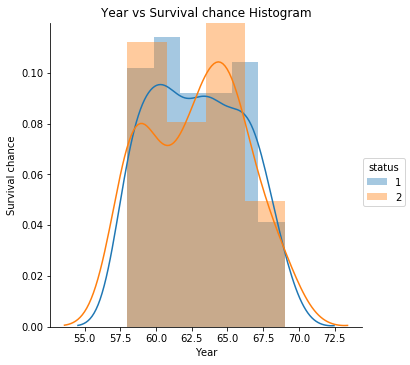

In [9]:
plt.close()
sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "year").add_legend();
plt.xlabel("Year")
plt.ylabel("Survival chance")
plt.title("Year vs Survival chance Histogram")
plt.show();

#### Observation
As per the above 3 histogram my observation is that people having more number of nodes have more chances of survival than those who have less nodes. This can be clearly concluded through the PDF drawn in 1st histogram plot.

#### PDF and CDF
Now when we have come to know that nodes are the important feature on which we can build our model lets draw PDF and CDF for nodes of those pateints who survived more than 5 years

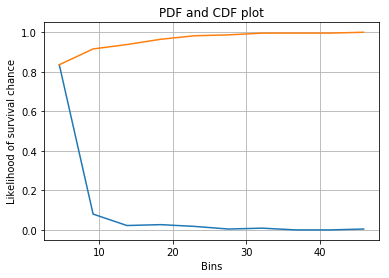

In [10]:

counts, bin_edges = np.histogram(df['nodes'][df['status'] == 1], bins=10, density=True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.xlabel("Bins")
plt.ylabel("Likelihood of survival chance")
plt.title("PDF and CDF plot")
plt.grid()
plt.show();

#### Observation
Here my observation is pateints who survived more than 5 years have that 82% of nodes less than equal to 3

#### Box Plot

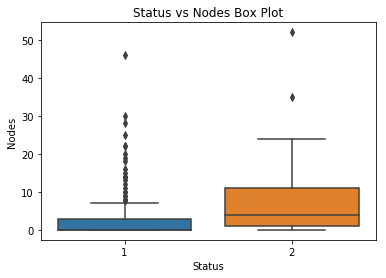

In [11]:
plt.close()
sns.boxplot(x='status', y='nodes', data=df)
plt.xlabel("Status")
plt.ylabel("Nodes")
plt.title("Status vs Nodes Box Plot")
plt.show()

#### Observation
1. Threshold for more than 5 years survival is 0 to 7 and lesser survival is 0 to 12.
2. 25th and 50th percentile is very close and 75th percentile is 3.5 for longer survival which is almost near to 0 whereas 25th    percentile is 2, 50th percentile is 4 and 75th percentile is 11 for lesser survival.
3. If we consider 3.5 as a threshold for building model then there will be a chances of getting 45% error as it clashes the just    below 50th percentile of less survival chance.

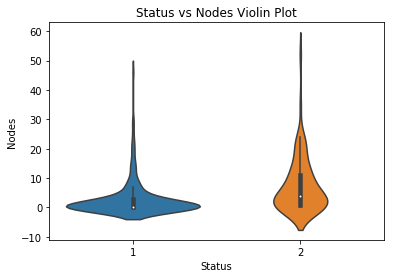

In [12]:
plt.close()
sns.violinplot(x='status', y='nodes', data=df)
plt.xlabel("Status")
plt.ylabel("Nodes")
plt.title("Status vs Nodes Violin Plot")
plt.show()

#### Observation
1. Density in longer survival is higher near 0 whereas it is less in lesser survival chance

## Question 4
Analysing Bi-variate first to get better understanding for Uni-variate plots

2-D Scatter plot

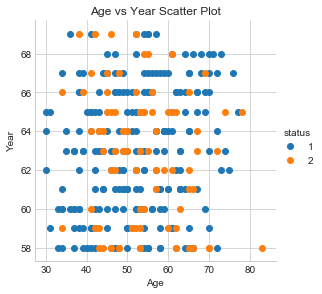

In [13]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue='status' , size=4).map(plt.scatter, 'age', 'year').add_legend();
plt.xlabel("Age")
plt.ylabel("Year")
plt.title("Age vs Year Scatter Plot")
plt.show()

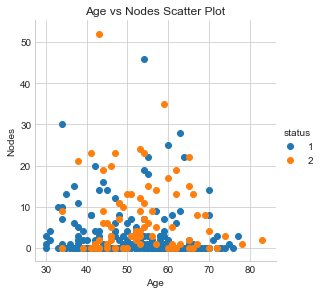

In [14]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue='status' , size=4).map(plt.scatter, 'age', 'nodes').add_legend();
plt.xlabel("Age")
plt.ylabel("Nodes")
plt.title("Age vs Nodes Scatter Plot")
plt.show()

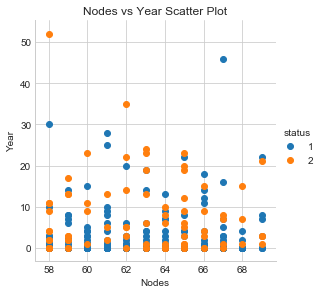

In [15]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue='status' , size=4).map(plt.scatter, 'year', 'nodes').add_legend();
plt.xlabel("Nodes")
plt.ylabel("Year")
plt.title("Nodes vs Year Scatter Plot")
plt.show()

#### Observation:
From all 3 scatter plots its hard to judge which could be a the pefect analysis which can be used to build a perfect model.

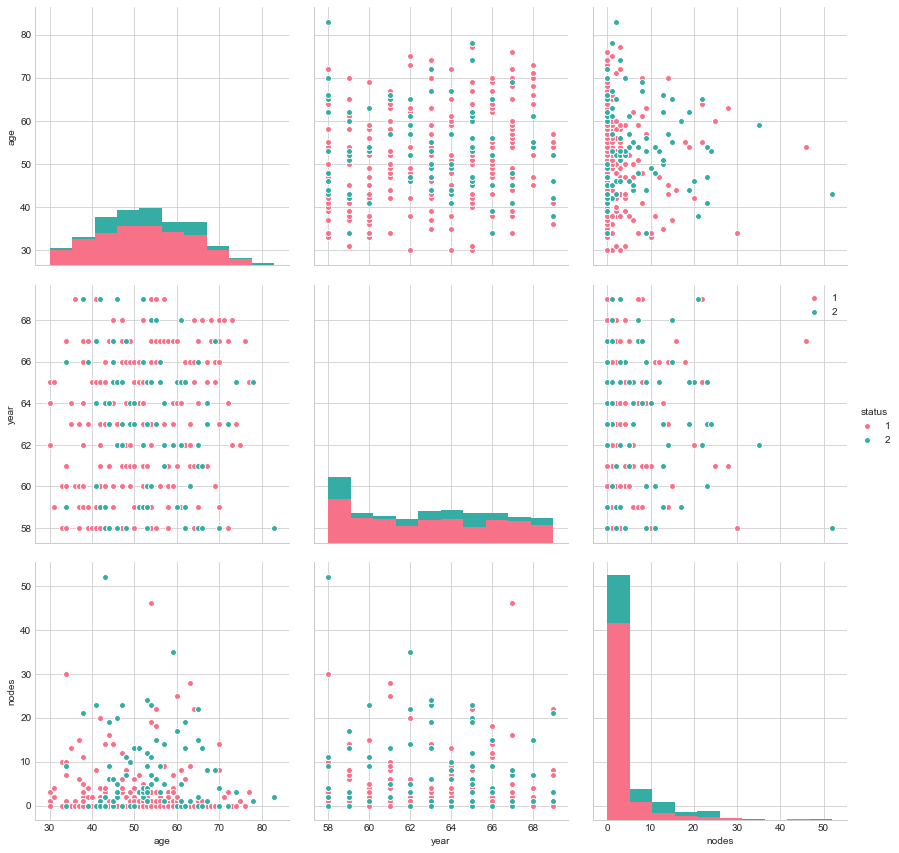

In [16]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df, hue='status', vars=["age", "year", "nodes"], palette="husl", size=4)
plt.legend()
plt.show()

#### Observation:
1. Here I will ignore the last row and last column which show's status vs all the other fetures, because status is class/label
   which tells whether the patient survived or died in 5 years and we are finding the feature which can give this output.
2. Taking glance at all right-most top 3 plots we can say its hard to judge which can be used for building better model so we      got compartively a better through in histograms.